
# Car Price Case Study #####

#### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-Which variables are significant in predicting the price of a car

-How well those variables describe the price of a car


##  Reading and Understanding the Data

import NumPy and Pandas and read the car dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore') ##to suppress the warnings


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('precision', 2) ## to set the number of decimals to 2 for this jupyter worksheet

In [3]:
car = pd.read_csv("E:\Course_Outline\IIIT\course 3\LR_Assignment\CarPrice_Assignment.csv")
car=car.drop(columns = ['car_ID']) ##this column is just a serial number
 ##there may be some names or words which may be duplicate 
#but due different cases they may be counted twice 
car.apply(lambda x: x.astype(str).str.lower()) 
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


shape and dtypes of the dataframe

In [4]:
car.shape

(205, 25)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [6]:
print(car.isnull().sum()) #there is Zero nulls in the dataset

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [10]:
##as brand name is feature and could affect the price of the car
##but the models of a brand has different prices 
## so taking the "CarName" as it is not adding any value to analysis, however, 
##if we extract brand name then it explain some variation in the price.
new = car["CarName"].str.split("-", n = 1, expand = True) 
car["brand"]= new[0] 
new = car["brand"].str.split(" ", n = 1, expand = True)  
car["brand"]= new[0] 

car1 = car.drop(columns =["CarName"]) 

##to identfy the unique values in the categorical variables

print(car1['symboling'].unique()) # no need to convert to dummy
print(car1['fuelsystem'].unique()) ##convert to dummy 1
print(car1['fueltype'].unique()) ####convert to dummy 2
print(car1['aspiration'].unique())##convert to dummy 3
print(car1['carbody'].unique())##convert to dummy 4
print(car1['drivewheel'].unique())##convert to dummy 5
print(car1['enginelocation'].unique())##convert to dummy 6
print(car1['enginetype'].unique())##convert to dummy 7
print(car1['brand'].unique())##convert to dummy 8

##as these variables are already numericals but written as words so need to convert to the integers
print(car1['cylindernumber'].unique())  # convert from str to integer
print(car1['doornumber'].unique())  # convert from str to integer

list1 = {'four':4, 'six':6, 'five':5, 'three':3 ,'twelve':12 ,'two' :2,'eight':8}
car1['doornumber']=car1['doornumber'].map(list1)
car1['cylindernumber']=car1['cylindernumber'].map(list1)

##this word was not converted to lower case despite multiple attempts so I replaced it separately
##some words are misspelt so I have to correct so that categorical variable has proper number of options
car1.replace(to_replace = 'Nissan', value = 'nissan', inplace = True)
car1.replace(to_replace = 'maxda', value = 'mazda', inplace = True)
car1.replace(to_replace = 'porcshce', value = 'porsche', inplace = True)
car1.replace(to_replace = 'toyouta', value = 'toyota', inplace = True)
car1.replace(to_replace = 'vokswagen', value = 'volkswagen', inplace = True)
car1.replace(to_replace = 'vw', value = 'volkswagen', inplace = True)
print(" ")
print(" ")
print(car1['brand'].unique())
car1.head(2)

[ 3  1  2  0 -1 -2]
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'maxda'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['two' 'four']
 
 
['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'mazda'
 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'porsche'
 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa


##  Visualising the Data
1. to indentify multicollinearity
2. to catch at first if there is trend or particular pattern between certain variables

## checking outliers and Invalid values


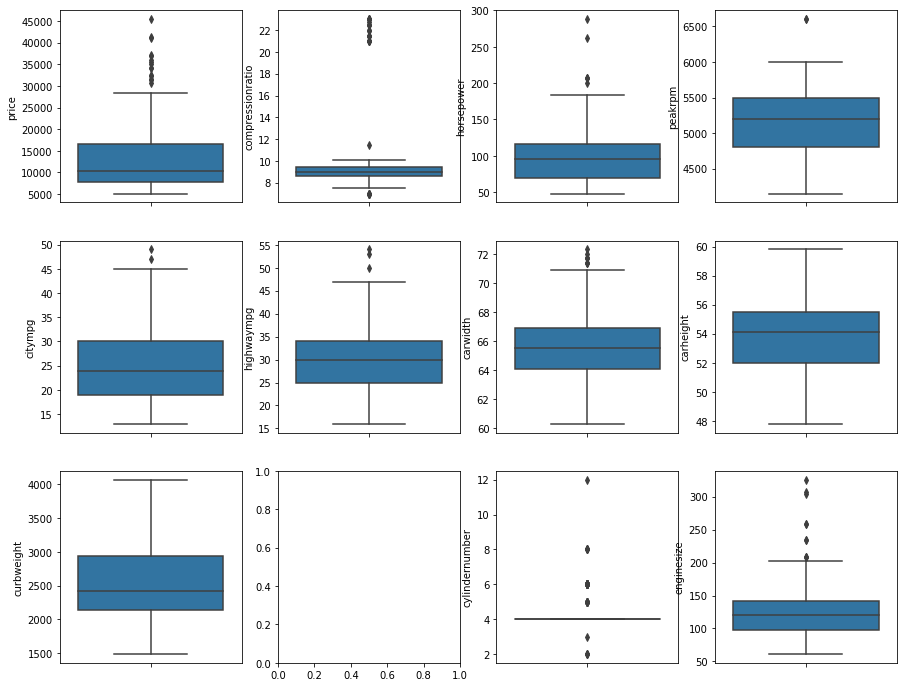

In [14]:
plt.figure(figsize=(15, 12))
plt.subplot(3,4,1)
sns.boxplot(y ='price', data = car1)
plt.subplot(3,4,2)
sns.boxplot(y ='compressionratio', data = car1)
plt.subplot(3,4,3)
sns.boxplot(y ='horsepower', data = car1)
plt.subplot(3,4,4)
sns.boxplot(y ='peakrpm', data = car1)
plt.subplot(3,4,5)
sns.boxplot(y ='citympg', data = car1)
plt.subplot(3,4,6)
sns.boxplot(y ='highwaympg', data = car1)
plt.subplot(3,4,7)
sns.boxplot(y ='carwidth', data = car1)
plt.subplot(3,4,8)
sns.boxplot(y ='carheight', data = car1)
plt.subplot(3,4,9)
sns.boxplot(y ='curbweight', data = car1)
plt.subplot(3,4,10)
plt.subplot(3,4,11)
sns.boxplot(y ='cylindernumber', data = car1)
plt.subplot(3,4,12)
sns.boxplot(y ='enginesize', data = car1)


plt.show()

<Figure size 2160x2160 with 0 Axes>

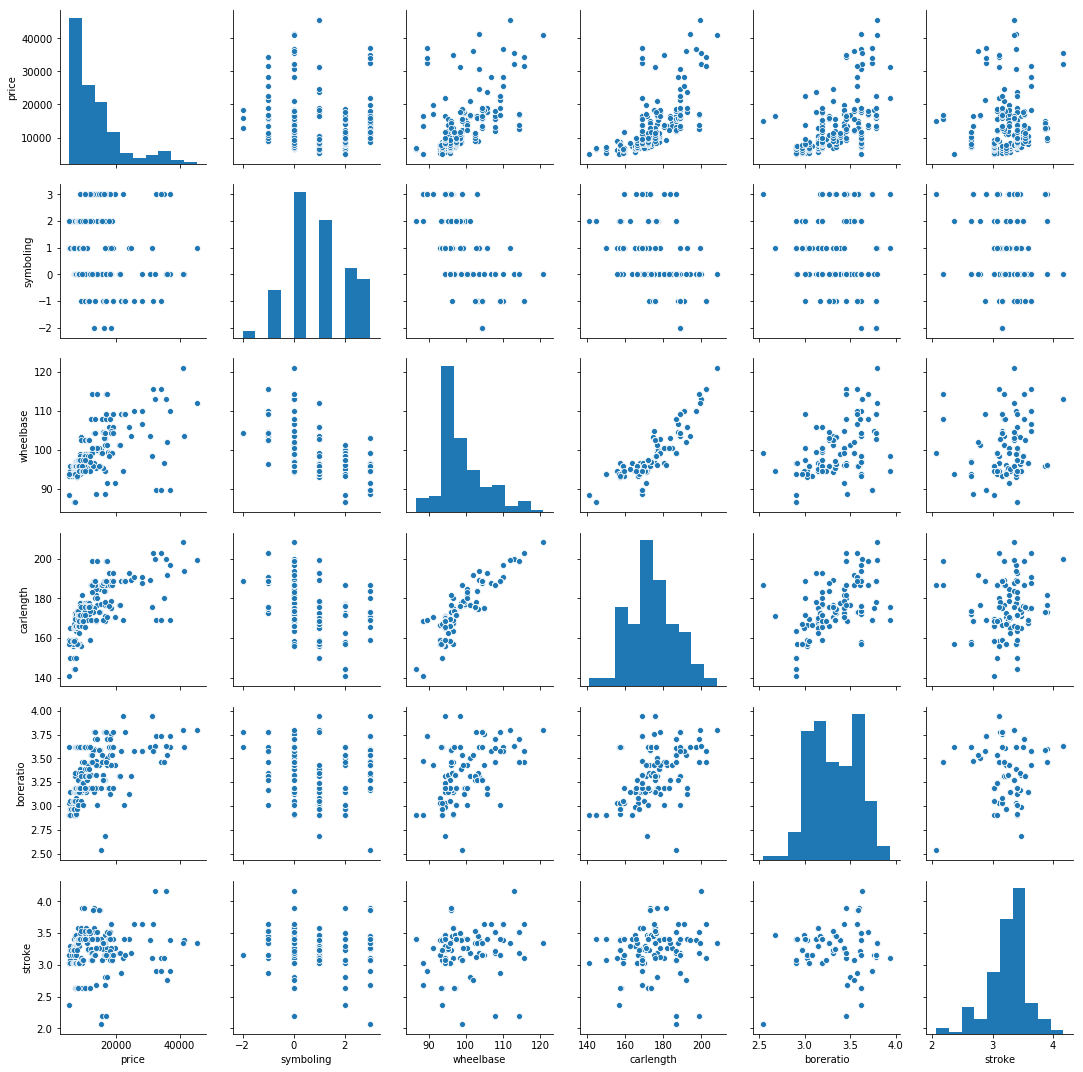

In [30]:
#doign EDA to see if there is any relationship between different features and Price of the car
plt.figure(figsize=(30, 30))
sns.pairplot(car1[['price',"symboling",'wheelbase','carlength','boreratio','stroke']])
plt.show()

there is good positive correlation between Price and Carlength and some what correlation betweeen boreratio and Price

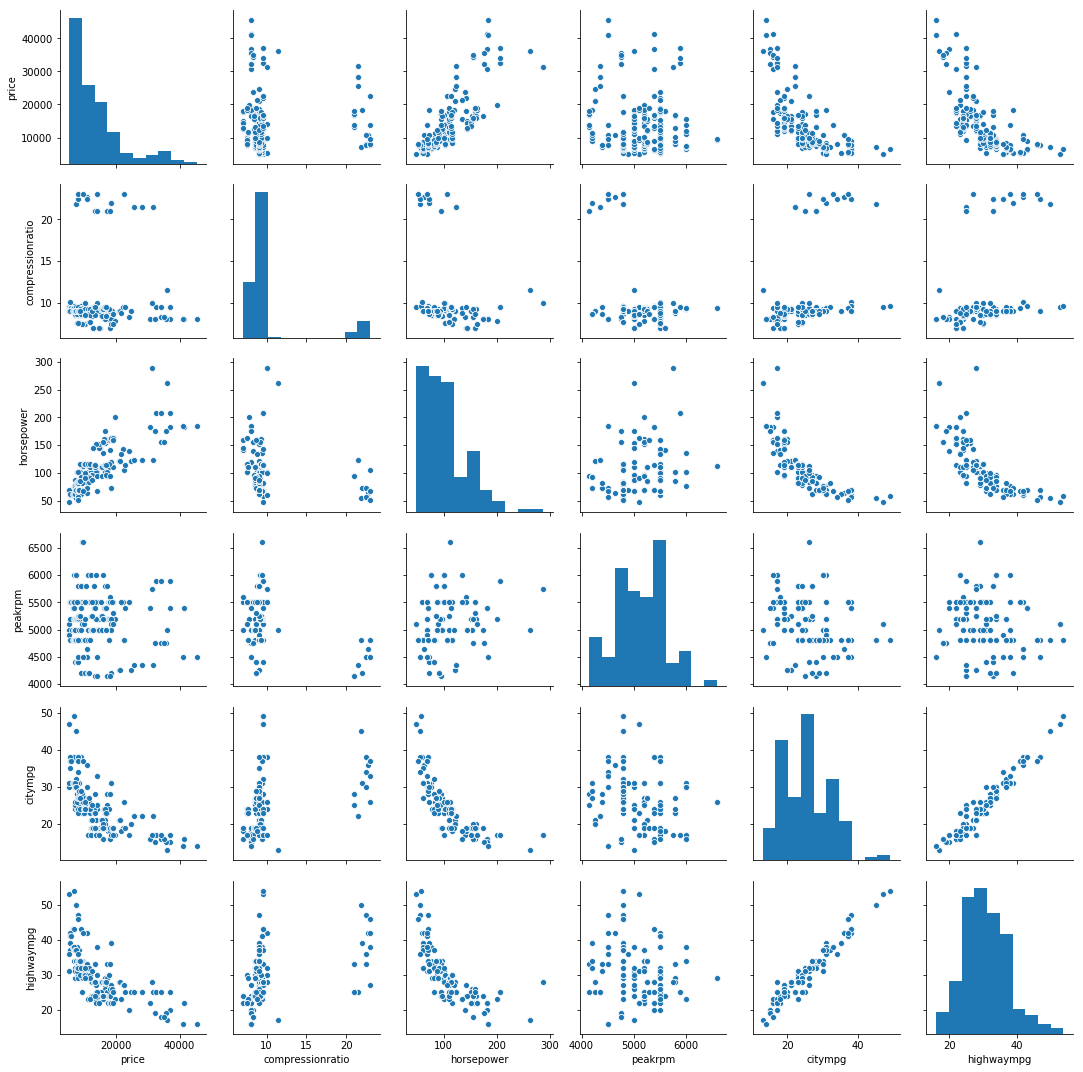

In [31]:
sns.pairplot(car1[['price','compressionratio'  ,'horsepower','peakrpm','citympg','highwaympg']])
plt.show()

Price is positively correlated with horse power and negatively correlated with highwaympg and citympg

<Figure size 1080x864 with 0 Axes>

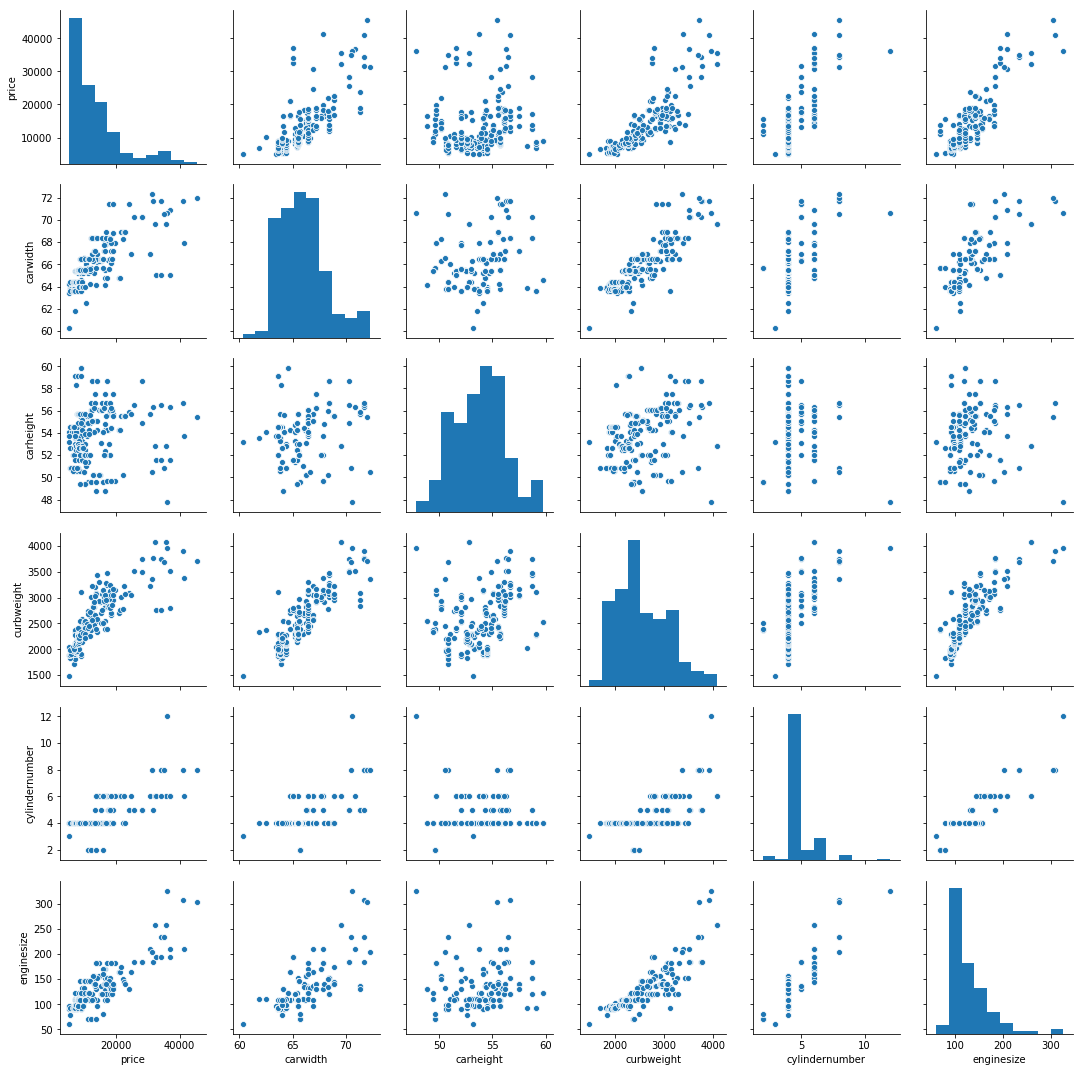

In [32]:
plt.figure(figsize=(15, 12))
sns.pairplot(car1[['price','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize']])
plt.show()
##'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',,'fuelsystem','brand'

Price is positively correlated with Enginesize, curbweight, and carwidth and all these features are in sync with the normal understanding that higher are these features higher the price

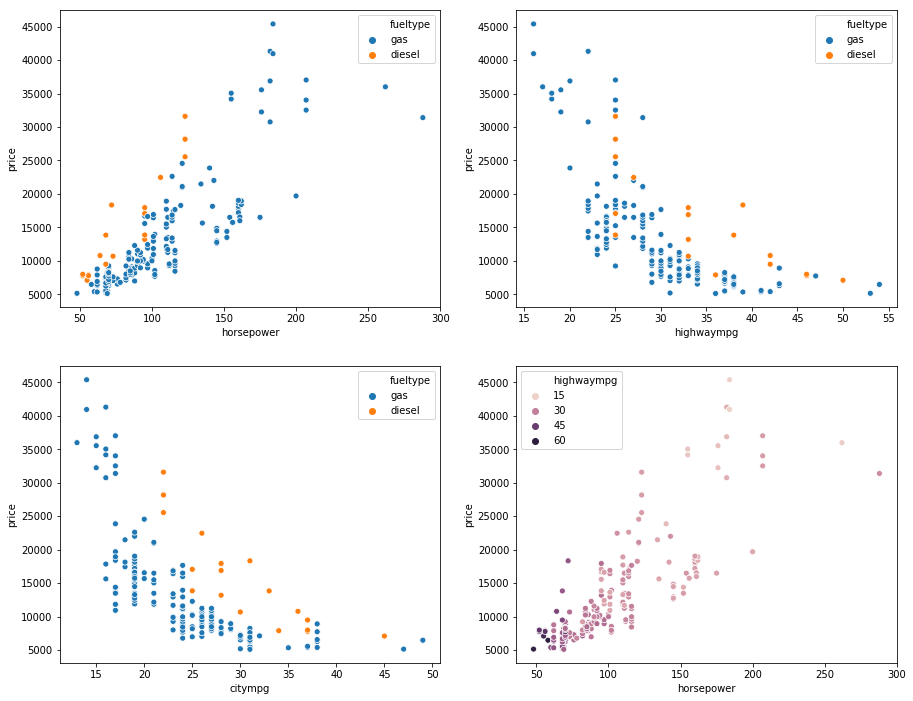

In [33]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.scatterplot(x='horsepower', y='price', hue = 'fueltype', data=car1)
plt.subplot(2,2,2)
sns.scatterplot(x='highwaympg', y='price', hue = 'fueltype', data=car1)
plt.subplot(2,2,3)
sns.scatterplot(x='citympg', y='price', hue = 'fueltype', data=car1)
plt.subplot(2,2,4)
sns.scatterplot(x='horsepower', y='price', hue = 'highwaympg', data=car1)

# Ploting the Categorical Variables

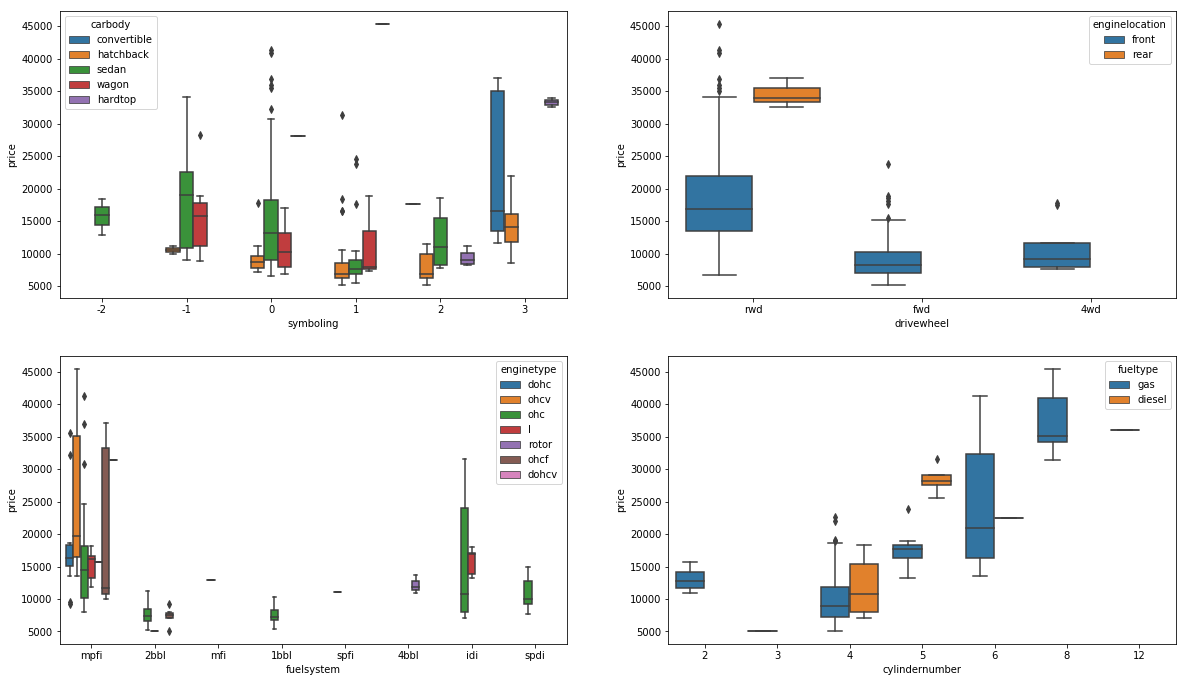

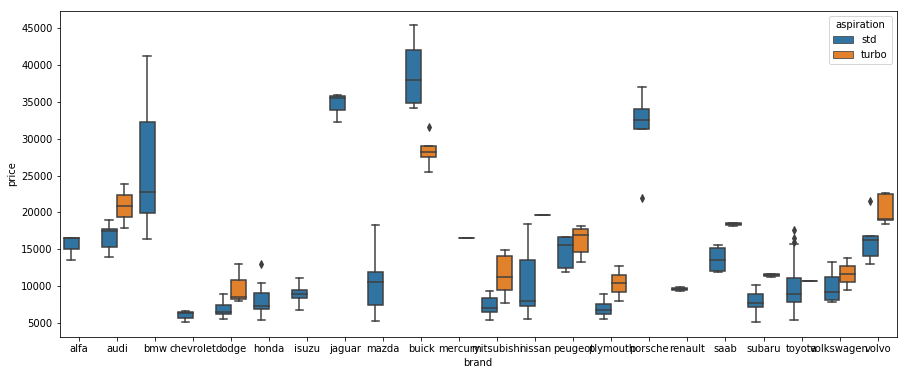

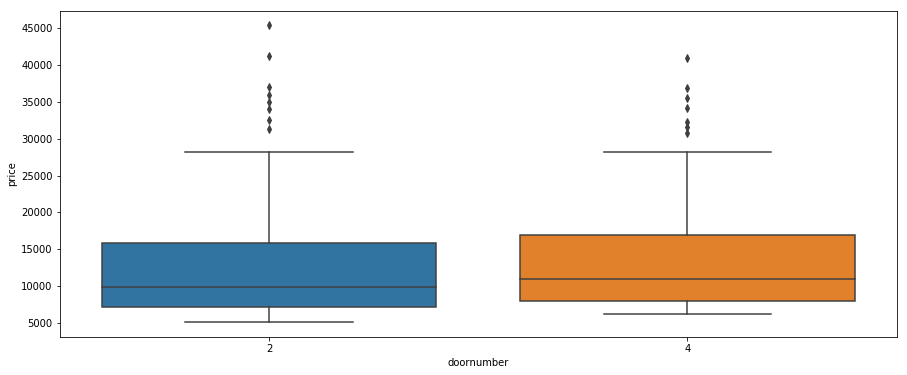

In [35]:
plt.figure(figsize = (20,18))
plt.subplot(3,2,1)
sns.boxplot(x= 'symboling', y = 'price', hue = 'carbody', data=car1)
plt.subplot(3,2,2)
sns.boxplot(x= 'drivewheel', y = 'price', hue = 'enginelocation',data=car1)
plt.subplot(3,2,3)
sns.boxplot(x= 'fuelsystem', y = 'price',hue = 'enginetype', data=car1)
plt.subplot(3,2,4)
sns.boxplot(x= 'cylindernumber', y = 'price', hue = 'fueltype',data=car1)

plt.figure(figsize = (15,6))
sns.boxplot(x= 'brand', y = 'price', hue = 'aspiration',data=car1)

plt.figure(figsize = (15,6))
sns.boxplot(x= 'doornumber', y = 'price', data=car1)


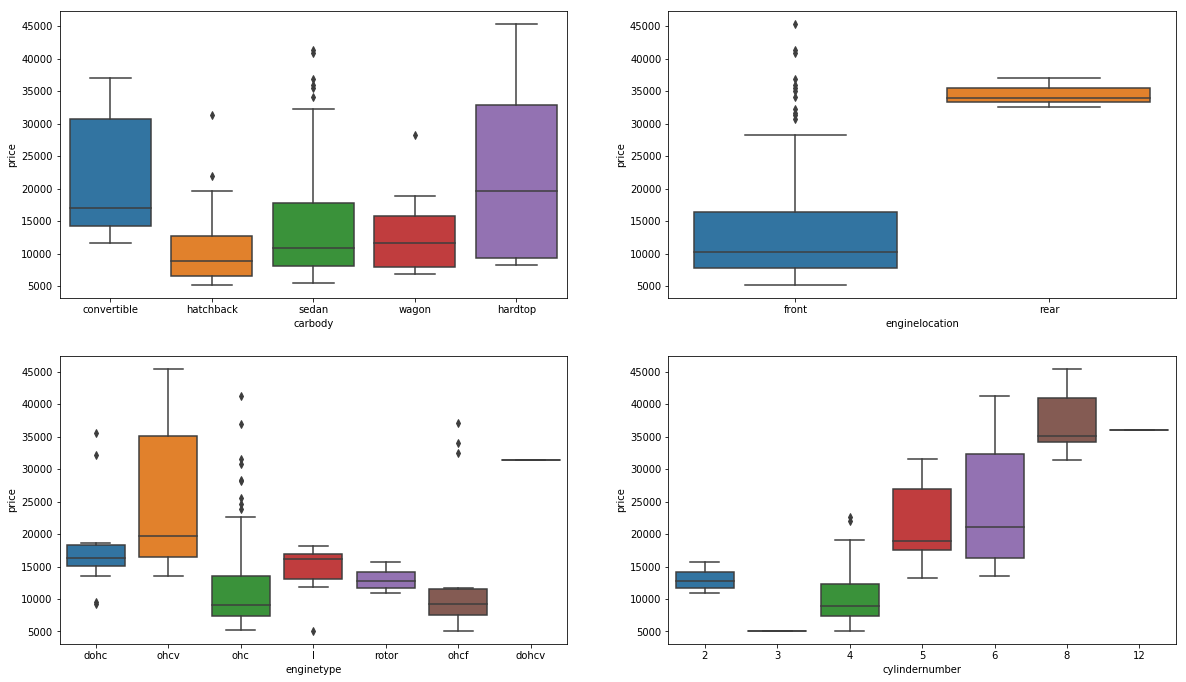

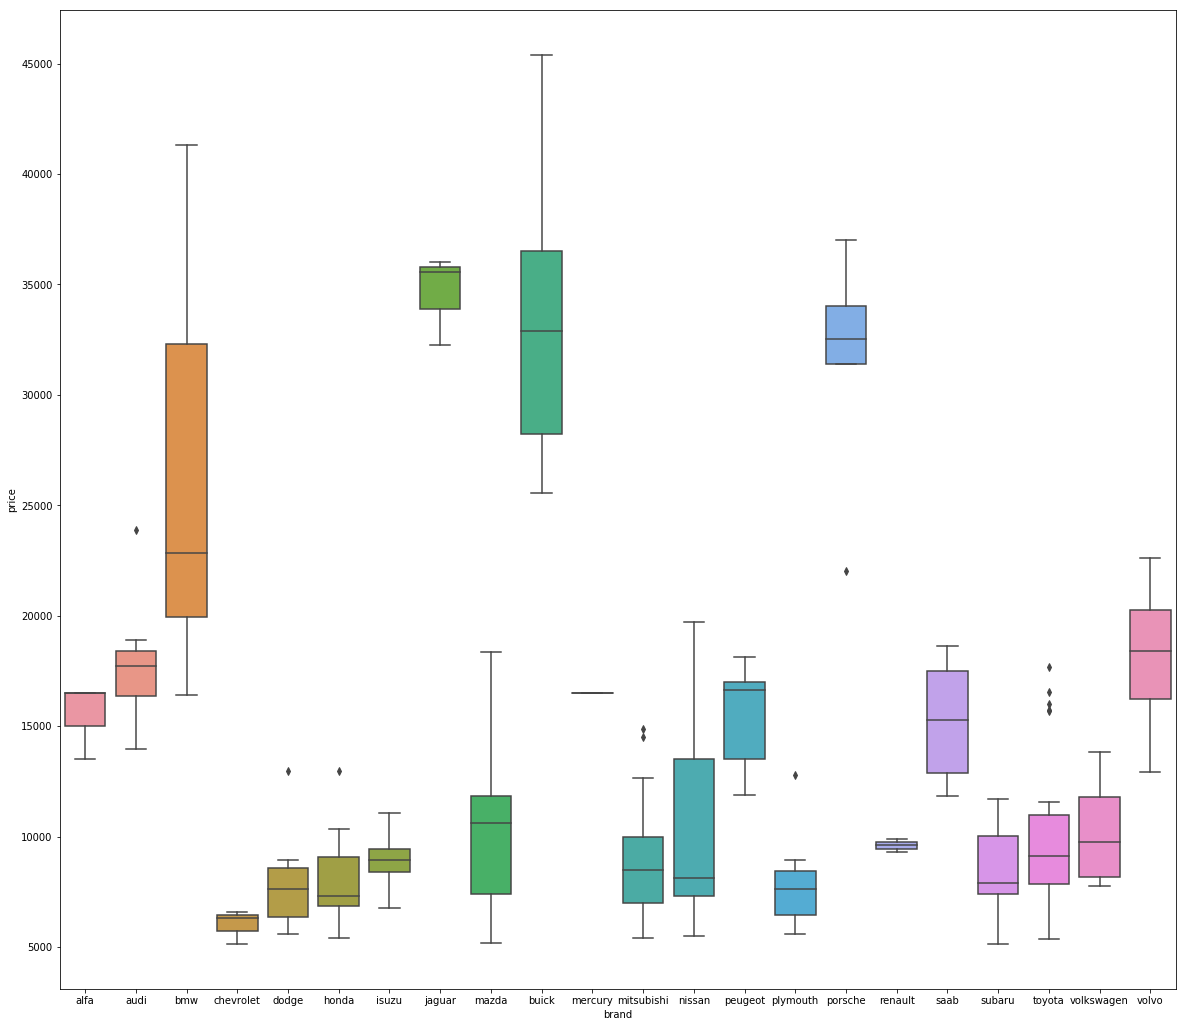

In [36]:
plt.figure(figsize = (20,18))
plt.subplot(3,2,1)
sns.boxplot(x= 'carbody', y = 'price', data=car1)
plt.subplot(3,2,2)
sns.boxplot(x= 'enginelocation', y = 'price', data=car1)
plt.subplot(3,2,3)
sns.boxplot(x= 'enginetype', y = 'price', data=car1)
plt.subplot(3,2,4)
sns.boxplot(x= 'cylindernumber', y = 'price', data=car1)

plt.figure(figsize = (20,18))
sns.boxplot(x= 'brand', y = 'price', data=car1)
plt.show()

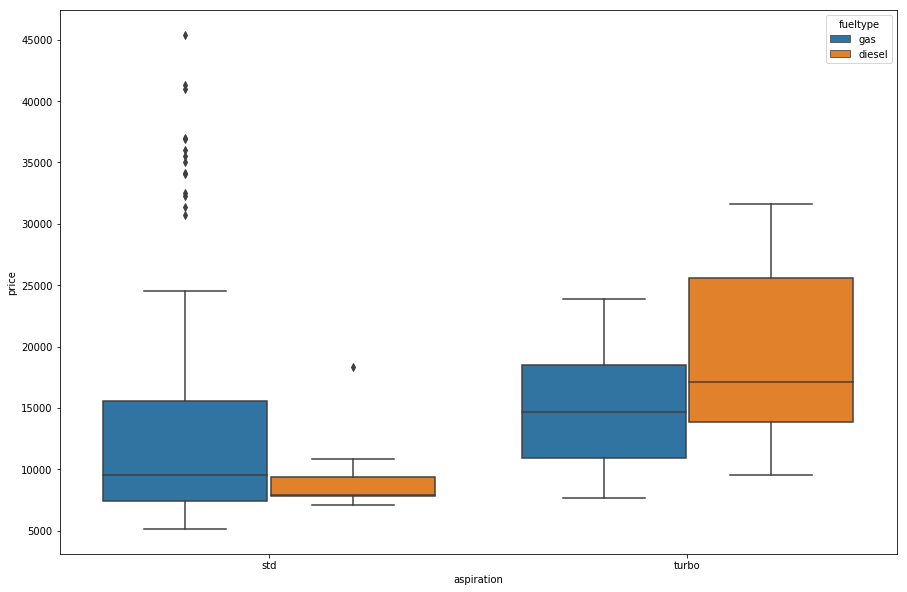

In [37]:
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'aspiration', y = 'price', hue = 'fueltype', data = car1)
plt.show()

## Data Preparation

- Dataset has many categorical variables ansd few of them are already in numerical form but others are not
- In order to fit reggression we need to make every variable in numerical form so I will create Dummy for all categorical variables

In [70]:
#br_dm = pd.get_dummies(car1['brand'],drop_first = True) ##dropped first as 0 in all remaining columns will identify the dropped column
###i dropped this as this does not make much of the business sense except in few cases such as BMW or AUDi or Porche
fs_dm = pd.get_dummies(car1['fuelsystem'],drop_first = True) 
ft_dm = pd.get_dummies(car1['fueltype'],drop_first = True)
as_dm = pd.get_dummies(car1['aspiration'],drop_first = True)
cb_dm = pd.get_dummies(car1['carbody'],drop_first = True)
dw_dm = pd.get_dummies(car1['drivewheel'],drop_first = True)
el_dm = pd.get_dummies(car1['enginelocation'],drop_first = True)
et_dm = pd.get_dummies(car1['enginetype'],drop_first = True)

In [16]:
car1 = pd.concat([car1,fs_dm,ft_dm,as_dm,cb_dm,dw_dm,el_dm,et_dm], axis=1)
car2= car1.drop(["brand",'enginetype','fuelsystem','fueltype',"aspiration",'carbody','drivewheel','enginelocation'], axis = 1)

## Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [17]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test = train_test_split(car2, train_size = 0.7, test_size = 0.3, random_state = 100)


### Rescaling the Features 

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
# Apply scaler() to all the columns except the 'dummy' variables
var_scale = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight','curbweight',
            'enginesize', 'cylindernumber', 'boreratio', 'stroke','compressionratio',
           'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price','carwidth']

train[var_scale] = scaler.fit_transform(train[var_scale])
train.describe()


C:\Users\ANIL KUMAR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
count,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,143.00,...,143.00,143.00,143.00,1.43e+02,1.43e+02,143.00,143.00,143.00,143.00,143.00
mean,0.56,0.56,0.41,0.53,0.46,0.51,0.41,0.24,0.24,0.50,...,0.13,0.59,0.35,6.99e-03,6.99e-03,0.06,0.69,0.08,0.06,0.03
std,0.24,0.50,0.21,0.20,0.18,0.22,0.21,0.12,0.15,0.21,...,0.34,0.49,0.48,8.36e-02,8.36e-02,0.24,0.47,0.28,0.24,0.17
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.00,0.27,0.40,0.30,0.35,0.25,0.20,0.14,0.31,...,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00
50%,0.60,1.00,0.34,0.50,0.43,0.52,0.36,0.20,0.18,0.50,...,0.00,1.00,0.00,0.00e+00,0.00e+00,0.00,1.00,0.00,0.00,0.00
75%,0.60,1.00,0.50,0.67,0.55,0.67,0.56,0.20,0.30,0.68,...,0.00,1.00,1.00,0.00e+00,0.00e+00,0.00,1.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00e+00,1.00e+00,1.00,1.00,1.00,1.00,1.00


### Dividing into X and Y sets for the model building
####  Out of 66 variables selecting few by hit and trial would be difficult sot the RFE method would be best option here to shortlist few important features from the dataset

In [21]:
y_tr = train.pop('price')
x_tr = train
x_tr.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
122,0.6,1.0,0.24,0.43,0.29,0.27,0.27,0.2,0.14,0.23,...,0,1,0,0,0,0,1,0,0,0
125,1.0,0.0,0.27,0.45,0.67,0.21,0.50,0.2,0.34,1.00,...,0,0,1,0,0,0,1,0,0,0
166,0.6,0.0,0.27,0.45,0.31,0.42,0.31,0.2,0.14,0.44,...,0,0,1,0,0,0,0,0,0,0
1,1.0,0.0,0.07,0.45,0.32,0.09,0.41,0.2,0.26,0.63,...,0,0,1,0,0,0,0,0,0,0
199,0.2,1.0,0.61,0.78,0.58,0.86,0.65,0.2,0.26,0.75,...,1,0,1,0,0,0,1,0,0,0


### Getting significant Features using RFE as there are a lot of variables manually it will not be possible to check and extract

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [23]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_tr, y_tr)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_tr, y_tr)
list(zip(x_tr.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 16),
 ('doornumber', False, 27),
 ('wheelbase', False, 5),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 3),
 ('horsepower', True, 1),
 ('peakrpm', False, 13),
 ('citympg', False, 19),
 ('highwaympg', False, 6),
 ('2bbl', False, 24),
 ('4bbl', False, 22),
 ('idi', False, 2),
 ('mfi', False, 29),
 ('mpfi', False, 23),
 ('spdi', False, 17),
 ('spfi', False, 28),
 ('gas', False, 12),
 ('turbo', False, 18),
 ('hardtop', False, 8),
 ('hatchback', False, 7),
 ('sedan', False, 10),
 ('wagon', False, 9),
 ('fwd', False, 25),
 ('rwd', False, 15),
 ('rear', True, 1),
 ('dohcv', True, 1),
 ('l', False, 26),
 ('ohc', False, 4),
 ('ohcf', False, 11),
 ('ohcv', False, 20),
 ('rotor', True, 1)]

In [71]:
col1 = x_tr.columns[rfe.support_] ## getting column names supprted by RFE

x_tr_rfe = x_tr[col1]
col1
#X_train.columns[~rfe.support_]


Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'rear', 'dohcv', 'rotor'],
      dtype='object')

### Now I will create a model using the Rfe_support attributres and then calculate VIF for each model and I will drop the variables for new model on the basis of the VIF and P value in the model (singinficance Level)

## Model 1

In [28]:
# to Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_tr[col1]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


import statsmodels.api as sm

# Add a constant
x_tr_lr1 = sm.add_constant(x_tr_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_tr, x_tr_lr1).fit()
# Check the summary obtained
print(lr1.summary())

         Features    VIF
1      curbweight  43.74
0        carwidth  36.84
3      enginesize  35.24
2  cylindernumber  18.05
6      horsepower  15.13
4       boreratio   9.65
5          stroke   7.44
8           dohcv   1.50
9           rotor   1.48
7            rear   1.20
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     87.53
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.96e-53
Time:                        23:09:17   Log-Likelihood:                 162.26
No. Observations:                 143   AIC:                            -302.5
Df Residuals:                     132   BIC:                            -269.9
Df Model:                          10                                         
Covariance Typ

## Model 2

In [32]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col2=col.drop('horsepower') ##horsepower is insignificant in the model
x_tr_rfe2=x_tr[col2]
vif = pd.DataFrame()
x = x_tr[col2]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)


import statsmodels.api as sm

# Add a constant
x_tr_lr2 = sm.add_constant(x_tr_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_tr, x_tr_lr2).fit()
# Check the summary obtained

print(lr2.summary())
print(' ')


         Features    VIF
1      curbweight  42.19
0        carwidth  36.74
3      enginesize  30.59
2  cylindernumber  17.46
4       boreratio   9.65
5          stroke   7.33
8           rotor   1.25
7           dohcv   1.15
6            rear   1.12
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     96.69
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.23e-54
Time:                        23:12:08   Log-Likelihood:                 161.43
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     133   BIC:                            -273.2
Df Model:                           9                                         
Covariance Type:            nonrobust  

## Model 3

In [34]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col3=col2.drop('curbweight')
x_tr_rfe3=x_tr[col3]
vif = pd.DataFrame()
x = x_tr[col3]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

import statsmodels.api as sm

# Add a constant
x_tr_lr3 = sm.add_constant(x_tr_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_tr, x_tr_lr3).fit()
# Check the summary obtained

print(lr3.summary())
print('')


         Features    VIF
0        carwidth  22.37
2      enginesize  17.18
1  cylindernumber  16.19
3       boreratio   9.46
4          stroke   7.27
7           rotor   1.22
6           dohcv   1.12
5            rear   1.11
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.11e-54
Time:                        23:13:09   Log-Likelihood:                 159.31
No. Observations:                 143   AIC:                            -300.6
Df Residuals:                     134   BIC:                            -274.0
Df Model:                           8                                         
Covariance Type:            nonrobust                           

## Model 4

In [41]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col4=col3.drop('carwidth')
x_tr_rfe4=x_tr[col4]
vif = pd.DataFrame()
x = x_tr[col4]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

import statsmodels.api as sm

# Add a constant
x_tr_lr4 = sm.add_constant(x_tr_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_tr, x_tr_lr4).fit()
# Check the summary obtained

print(lr4.summary())
print('')


         Features    VIF
0  cylindernumber  15.66
1      enginesize  15.46
2       boreratio   6.80
3          stroke   5.97
6           rotor   1.17
5           dohcv   1.10
4            rear   1.05
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     85.70
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.54e-46
Time:                        23:16:54   Log-Likelihood:                 138.11
No. Observations:                 143   AIC:                            -260.2
Df Residuals:                     135   BIC:                            -236.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
          

## Model 5

In [42]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col5=col4.drop('cylindernumber')
x_tr_rfe5=x_tr[col5]
vif = pd.DataFrame()
x = x_tr[col5]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

import statsmodels.api as sm

# Add a constant
x_tr_lr5 = sm.add_constant(x_tr_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_tr, x_tr_lr5).fit()
# Check the summary obtained

print(lr5.summary())
print('')


     Features   VIF
1   boreratio  6.74
0  enginesize  5.96
2      stroke  4.85
5       rotor  1.12
3        rear  1.05
4       dohcv  1.05
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     94.09
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.15e-46
Time:                        23:16:59   Log-Likelihood:                 134.15
No. Observations:                 143   AIC:                            -254.3
Df Residuals:                     136   BIC:                            -233.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025    

## Model 6

In [46]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col6=col5.drop('boreratio')
x_tr_rfe6=x_tr[col6]
vif = pd.DataFrame()
x = x_tr[col6]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

import statsmodels.api as sm

# Add a constant
x_tr_lr6 = sm.add_constant(x_tr_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_tr, x_tr_lr6).fit()
# Check the summary obtained

print(lr6.summary())
print('')


     Features   VIF
0  enginesize  3.90
1      stroke  3.85
4       rotor  1.08
2        rear  1.04
3       dohcv  1.04
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     113.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.80e-47
Time:                        23:20:40   Log-Likelihood:                 134.09
No. Observations:                 143   AIC:                            -256.2
Df Residuals:                     137   BIC:                            -238.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

## Model 7

In [48]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col7=col6.drop('stroke')
x_tr_rfe7=x_tr[col7]
vif = pd.DataFrame()
x = x_tr[col7]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

import statsmodels.api as sm

# Add a constant
x_tr_lr7 = sm.add_constant(x_tr_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_tr, x_tr_lr7).fit()
# Check the summary obtained

print(lr7.summary())
print('')


     Features   VIF
0  enginesize  1.05
2       dohcv  1.03
1        rear  1.02
3       rotor  1.00
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     141.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.98e-48
Time:                        23:22:30   Log-Likelihood:                 133.50
No. Observations:                 143   AIC:                            -257.0
Df Residuals:                     138   BIC:                            -242.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Model 8

In [74]:
# to Calculate the VIFs for the new model after removing curbweight
from statsmodels.stats.outliers_influence import variance_inflation_factor
col8=col7.drop('dohcv')
x_tr_rfe8=x_tr[col8]
vif = pd.DataFrame()
x = x_tr[col8]
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

import statsmodels.api as sm

# Add a constant
x_tr_lr8 = sm.add_constant(x_tr_rfe8)

# Create a first fitted model
lr8 = sm.OLS(y_tr, x_tr_lr8).fit()
# Check the summary obtained

print(lr8.summary())
print(' ')
print('As all the variabels are significant and has VIF value less than 2. So this model will be our final and better model')


     Features   VIF
0  enginesize  1.02
1        rear  1.02
2       rotor  1.00
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     186.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.76e-48
Time:                        23:53:47   Log-Likelihood:                 132.27
No. Observations:                 143   AIC:                            -256.5
Df Residuals:                     139   BIC:                            -244.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

## Residual Analysis

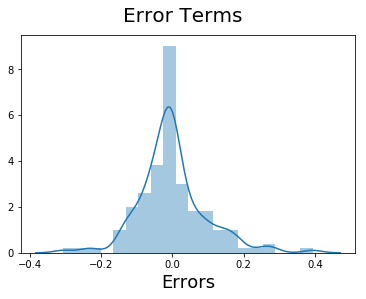

In [50]:
y_predict_price = lr8.predict(x_tr_lr8)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_tr - y_predict_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()


## Applying Model on the Test Data Set

#### Applying the scaling on the test sets

In [59]:

var_scale = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carheight','curbweight',
            'enginesize', 'cylindernumber', 'boreratio', 'stroke','compressionratio',
           'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price','carwidth']

test[var_scale] = scaler.transform(test[var_scale])

In [60]:
test.shape
x_ts = test
x_ts.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor
160,0.4,1.0,0.31,0.41,0.34,0.46,0.24,0.2,0.14,0.40,...,0,1,0,0,0,0,1,0,0,0
186,0.8,1.0,0.37,0.50,0.43,0.70,0.31,0.2,0.18,0.40,...,0,1,0,0,0,0,1,0,0,0
59,0.6,0.0,0.42,0.60,0.52,0.52,0.35,0.2,0.23,0.56,...,0,1,0,0,0,0,1,0,0,0
165,0.6,0.0,0.27,0.45,0.31,0.42,0.30,0.2,0.14,0.44,...,0,0,1,0,0,0,0,0,0,0
140,0.8,0.0,0.23,0.26,0.29,0.70,0.29,0.2,0.18,0.75,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X_test and y_test

In [61]:
y_ts = test.pop('price')

mse    =     0.008824170778458736
R2_score    =    0.8349024846749478
As r-square for model 8 with test data set is 83% which is very close to the train data set r square


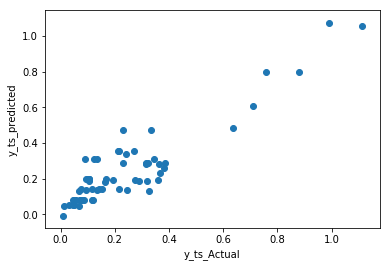

In [72]:
x_ts_lr8=x_ts[col8]
x_ts_lr8_p = sm.add_constant(x_ts_lr8)
y_ts_predict = lr8.predict(x_ts_lr8_p)
fig = plt.figure()
plt.scatter(y_ts, y_ts_predict)
plt.xlabel('y_ts_Actual')
plt.ylabel('y_ts_predicted')


from sklearn.metrics import r2_score,mean_squared_error 
r2_score(y_ts, y_ts_predict)
mse = mean_squared_error(y_ts, y_ts_predict)
print('mse    =    ', mse)
print('R2_score    =   ', r2_score(y_ts, y_ts_predict))
print('As r-square for model 8 with test data set is 83% which is very close to the train data set r square')


We can see that the equation of our best fitted line is:

$ price = -0.0914 + 1.250  \times  enginesize + 0.2627  \times  rear + 0.2554 \times rotor $